In [1]:
import math
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import pandas as pd

import zero

from zero.sgd_temporal import MangakiSGDTemporal

In [2]:
ratings_table = pd.read_csv('ratings.csv')
movies_table = pd.read_csv('movies.csv')

In [3]:
ratings_table

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
movies_table

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
ratings_table["realMovieId"] =ratings_table["movieId"]

In [6]:
ratings_table["userId"] = np.unique(ratings_table["userId"], return_inverse=True)[1]
ratings_table["movieId"] = np.unique(ratings_table["movieId"], return_inverse=True)[1]


In [7]:
ratings_table["mean_of_user"] = ratings_table.groupby('userId')["rating"].transform('mean')
ratings_table["std_of_user"] = ratings_table.groupby('userId')["rating"].transform('std')
ratings_table["scaled_rating"] = (ratings_table["rating"] - ratings_table["mean_of_user"])

In [8]:
users = np.array(ratings_table[['userId']])[:,0]
items =np.array(ratings_table[['movieId']])[:,0]
ratings =np.array(ratings_table[['rating']])[:,0]
timestamps =np.array(ratings_table[['timestamp']])[:,0]
mean_of_user = np.array(ratings_table[['mean_of_user']])[:,0]
std_of_user = np.array(ratings_table[['std_of_user']])[:,0]
scaled_ratings = np.array(ratings_table[['scaled_rating']])[:,0]


In [35]:
from collections import Counter

nb_dots = 100

movieIds = ratings_table["movieId"]
counter_movies = Counter(movieIds).most_common(nb_dots)

most_common_movies = [x[0] for x in counter_movies]

realMovieIds = ratings_table["realMovieId"]
counter_real_movies = Counter(realMovieIds).most_common(nb_dots)

most_common_ids = [x[0] for x in counter_real_movies]

most_common_movies

[314,
 277,
 257,
 510,
 1938,
 224,
 418,
 97,
 507,
 461,
 2224,
 0,
 897,
 46,
 2144,
 43,
 615,
 123,
 899,
 3633,
 910,
 659,
 398,
 509,
 1502,
 4131,
 4791,
 506,
 520,
 2077,
 337,
 31,
 322,
 968,
 334,
 2670,
 3189,
 1182,
 508,
 546,
 302,
 3136,
 325,
 6693,
 4421,
 914,
 512,
 793,
 436,
 138,
 963,
 7355,
 898,
 1283,
 4354,
 275,
 989,
 1978,
 1290,
 126,
 862,
 514,
 197,
 2832,
 254,
 895,
 9,
 3563,
 827,
 938,
 4607,
 4900,
 1733,
 921,
 32,
 913,
 901,
 1266,
 5363,
 474,
 594,
 3635,
 835,
 3814,
 592,
 2013,
 906,
 2037,
 3868,
 3617,
 815,
 3609,
 5901,
 504,
 1157,
 176,
 505,
 4153,
 1444,
 156]

In [10]:
ratings_table["ratings_by_movie"] = ratings_table.groupby('movieId')["rating"].transform('count')

In [11]:
nb_users = len(ratings_table.groupby("userId").count())
nb_items = len(ratings_table.groupby("movieId").count())

In [12]:
sgd = MangakiSGDTemporal(nb_users, nb_items)


initialization done
training rmse = 1.3776855540403319
testing rmse = 1.5100675678116742
training rmse = 0.8900954916916128
testing rmse = 0.963424477154518
training rmse = 0.8664248742762279
testing rmse = 0.9109547373989115
training rmse = 0.8583721179175929
testing rmse = 0.8942671611056929
training rmse = 0.8536110064651294
testing rmse = 0.886192767347928
training rmse = 0.8493849324867929
testing rmse = 0.880728074488744
training rmse = 0.8446308593378664
testing rmse = 0.8759224137368967
training rmse = 0.8387856514264518
testing rmse = 0.8709639735930392
training rmse = 0.8316217440975369
testing rmse = 0.8655801058443229
training rmse = 0.8232928826367261
testing rmse = 0.859895038973387
training rmse = 0.8142889626801566
testing rmse = 0.8542685765962226
training rmse = 0.8052044595440102
testing rmse = 0.8490585870514915
training rmse = 0.796481118179958
testing rmse = 0.8444591727090157
training rmse = 0.7883166311672775
testing rmse = 0.8404944040103207
training rmse = 0.7

0.8254444805038325

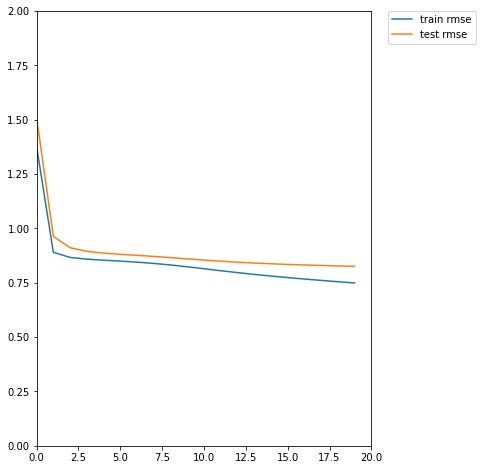

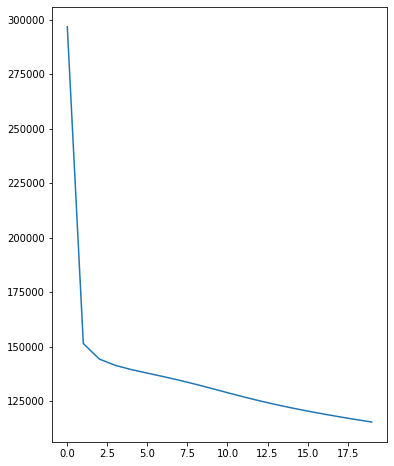

In [13]:
sgd.new_global_test(users, items, ratings, timestamps, mean_of_user, std_of_user, scaled_ratings, dynamic_strategy = "no temporal factor")

<IPython.core.display.Javascript object>


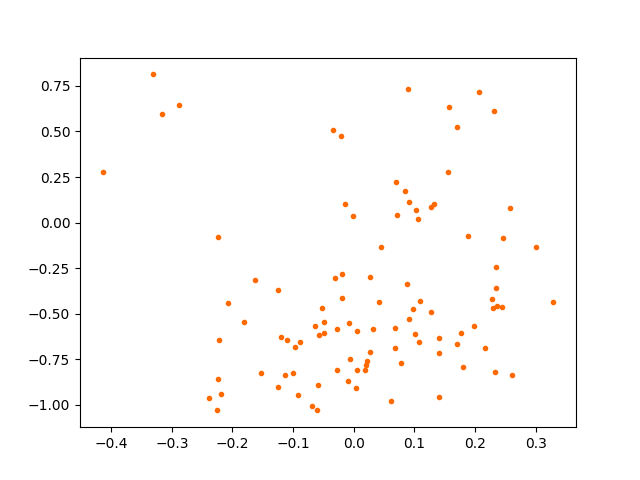

In [36]:
%matplotlib notebook

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD()

fig, ax = plt.subplots()

def display_title(x, y):

    plt.annotate(title_of_point[(x, y)], xy=(x, y), xycoords='data',
        xytext=(-30, -30), textcoords='offset points',
        arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3,rad=.2")
        )
    

def onpick(event):
    ind = most_common_movies[event.ind[0]]
    x, y = X_to_scatter[ind], Y_to_scatter[ind]
    a +=1
    display_title(x, y)

def load_points(X,Y, fig,ax,marker='.', color='#FF6A00', titles=None):
    ax.scatter(X,Y, marker=marker, c=color, picker=True)

    
V = sgd.V
V2 = svd.fit_transform(V)
np.save("Vmatrix.npy", V2)



X_to_scatter, Y_to_scatter = V2[most_common_movies,0],V2[most_common_movies,1]


#plt.scatter(X_to_scatter,Y_to_scatter)

most_common_names = [movies_table[movies_table["movieId"] == most_common_ids[i]]["title"] for i in range(len(most_common_ids))]
for i in range(len(most_common_names)):
    most_common_names[i] = most_common_names[i].values[0]

np.save("MostCommonNames.npy", most_common_names)
np.save("MostCommonMovies.npy", most_common_movies)

title_of_point = dict([(tuple([X_to_scatter[i], Y_to_scatter[i]]), most_common_names[i]) for i in range(len(most_common_movies))])

load_points(X_to_scatter, Y_to_scatter, fig, ax)

fig.canvas.mpl_connect('pick_event', onpick)
plt.show()



In [15]:
most_common_movies

[314,
 277,
 257,
 510,
 1938,
 224,
 418,
 97,
 507,
 461,
 2224,
 0,
 897,
 46,
 2144,
 43,
 615,
 123,
 899,
 3633,
 910,
 659,
 398,
 509,
 1502]

In [16]:
#sgd.new_global_test(users, items, ratings, timestamps, mean_of_user, std_of_user, scaled_ratings, dynamic_strategy = "exponential")

In [17]:
#sgd.cl_global_test(users, items, ratings, timestamps, mean_of_user, std_of_user, scaled_ratings, dynamic_strategy = "exponential factor")